# Cyberbullying Classification - #Equipo 4

[Dataset: Cyberbullying Classification](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data)

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize
import plotly.express as px


# from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve,roc_auc_score,auc
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

## Análisis explotario y preprocesamiento de datos

### Creación de dataframe cyberbullying classification

In [155]:
dataframe = pd.read_csv("cyberbullying_tweets.csv")

dataframe.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [156]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


#### Categorías analizadas

In [157]:
import pandas as pd

categorias_unicas = dataframe.iloc[:, 1].unique()

print("Categorías existentes en la columna cyberbullying_type:")
for categoria in categorias_unicas:
    print(categoria)


Categorías existentes en la columna cyberbullying_type:
not_cyberbullying
gender
religion
other_cyberbullying
age
ethnicity


### Cantidad de repeticiones de cada categoría

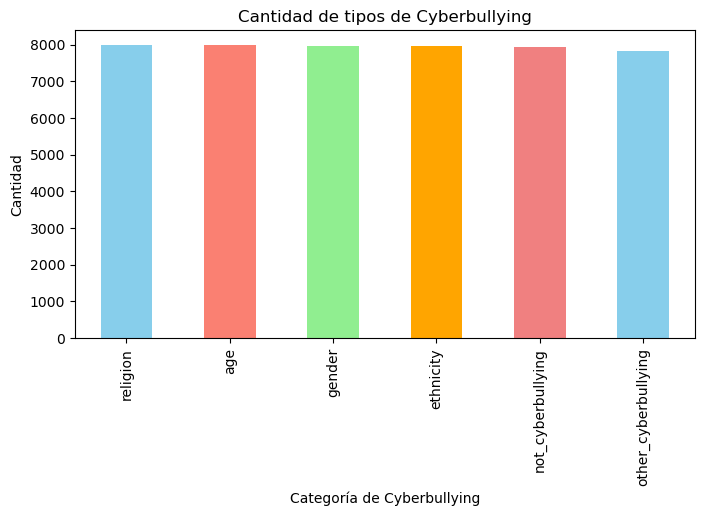

In [158]:
# Contar la cantidad de repeticiones de cada categoría
counts = dataframe['cyberbullying_type'].value_counts()

# Lista de colores para cada categoría
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']

# Crear un gráfico de barras
plt.figure(figsize=(8, 4))
counts.plot(kind='bar', color=colors)

# Configurar etiquetas y título
plt.xlabel('Categoría de Cyberbullying')
plt.ylabel('Cantidad')
plt.title('Cantidad de tipos de Cyberbullying')

plt.show()

### Diccionario de mapeo de tipos de bullying (clases) a números


In [159]:
cyberbullying_classes = {
    "not_cyberbullying": 0,
    "gender": 1,
    "religion": 2,
    "other_cyberbullying": 3,
    "age": 4,
    "ethnicity": 5
}

dataframe['cyberbullying_numeric_type'] = dataframe['cyberbullying_type'].map(cyberbullying_classes)
print(dataframe.head())
print(dataframe.tail())

                                          tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

   cyberbullying_numeric_type  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
                                              tweet_text cyberbullying_type  \
47687  Black ppl aren't expected to do anything, depe...          ethnicity   
47688  Turner did not withhold his disappointment. Tu...          ethnicity   
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity   
47690  Yea fuck you RT @therealexel: IF Y

### Estadísticas descriptivas para variables numéricas

In [160]:
print(dataframe.describe())

       cyberbullying_numeric_type
count                47692.000000
mean                     2.499602
std                      1.708993
min                      0.000000
25%                      1.000000
50%                      2.000000
75%                      4.000000
max                      5.000000


### Identificación de valores nulos 

In [161]:
# Obtener el total de tweets en el DataFrame
total_tweets = len(dataframe)

# Verificar si la columna tweet_text tiene valores NaN o nulos
null_values = dataframe['tweet_text'].isnull().sum()

# Imprimir los resultados
print("Total de tweets en el DataFrame:", total_tweets)
print("Total de valores NaN o nulos en la columna tweet_text:", null_values)

Total de tweets en el DataFrame: 47692
Total de valores NaN o nulos en la columna tweet_text: 0


### Exploración de Relaciones

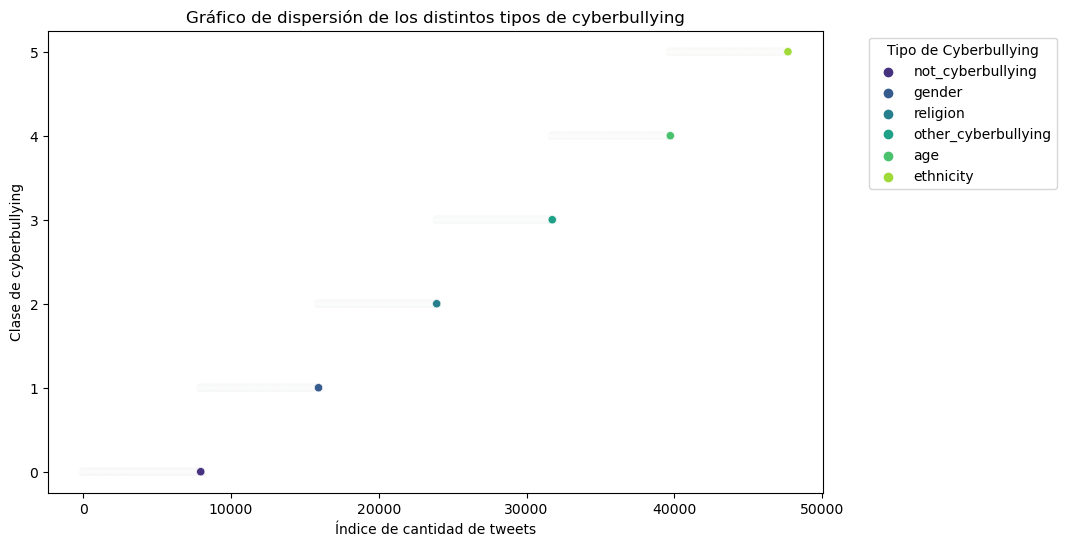

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dataframe.index, y='cyberbullying_numeric_type', hue='cyberbullying_type', data=dataframe, palette='viridis')
plt.title('Gráfico de dispersión de los distintos tipos de cyberbullying')
plt.xlabel('Índice de cantidad de tweets')
plt.ylabel('Clase de cyberbullying')
plt.legend(title='Tipo de Cyberbullying', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Hay que seguir investigando la naturaleza de la variable other_cyberbullying y entender si es posible utilizarla como regresora también, al igual que age, religion, ethnicity. 

In [163]:
def preprocess_column(column):
    column = column.str.lower() # convertir los tweets a minuscula.
    return column

dataframe['tweet_text'] = preprocess_column(dataframe['tweet_text'])
dataframe.head()

,tweet_text,cyberbullying_type,cyberbullying_numeric_type
0,"in other words #katandandre, your food was cra...",not_cyberbullying,0
1,why is #aussietv so white? #mkr #theblock #ima...,not_cyberbullying,0
2,@xochitlsuckkks a classy whore? or more red ve...,not_cyberbullying,0
3,"@jason_gio meh. :p thanks for the heads up, b...",not_cyberbullying,0
4,@rudhoeenglish this is an isis account pretend...,not_cyberbullying,0


In [164]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Define la función clean_tweet
def clean_tweet(tweet:str) -> str:
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE) # Remove urls
    tweet = re.sub(r'@[A-Za-z0-9]+','', tweet) # Remove @mentions
    tweet = re.sub(r'\#[A-Za-z0-9]+','', tweet) # Remove hashtags
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet) # Remove special characters and punctuation
    tweet = tweet.lower() # Convert to lowercase
    
    tokens = word_tokenize(tweet) # Tokenize
    
    stop_words = set(stopwords.words('english')) # Remove stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    clean_tweet = ' '.join(filtered_tokens) # Join tokens back into string
    
    return clean_tweet


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/noeliaqualindi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/noeliaqualindi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Se aplica la función clean_tweet a la columna 'tweet_text' y limpiamos los tweets de urls y caracteres especiales


In [165]:
dataframe['clean_tweet'] = dataframe['tweet_text'].apply(clean_tweet)

# mostramos los primeros registros del dataframe limpio
print(dataframe.head())

                                          tweet_text cyberbullying_type  \
0  in other words #katandandre, your food was cra...  not_cyberbullying   
1  why is #aussietv so white? #mkr #theblock #ima...  not_cyberbullying   
2  @xochitlsuckkks a classy whore? or more red ve...  not_cyberbullying   
3  @jason_gio meh. :p  thanks for the heads up, b...  not_cyberbullying   
4  @rudhoeenglish this is an isis account pretend...  not_cyberbullying   

   cyberbullying_numeric_type  \
0                           0   
1                           0   
2                           0   
3                           0   
4                           0   

                                         clean_tweet  
0                            words food crapilicious  
1                                              white  
2                   classy whore red velvet cupcakes  
3  gio meh p thanks heads concerned another angry...  
4  isis account pretending kurdish account like i...  


### Contabilización de palabras

In [166]:
def count_words(df: pd.DataFrame, cyberbullying_type : str = None):
    if cyberbullying_type is None:
        df_count = df
    else:
        df_count = df[df['cyberbullying_type'] == cyberbullying_type]
        
        
    text = ' '.join(df_count['clean_tweet'])
    
    words = text.split()
    
    word_counts = Counter(words)
    
    return word_counts

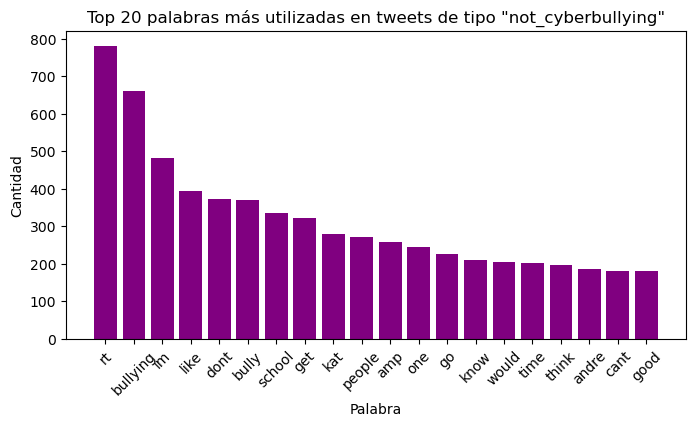

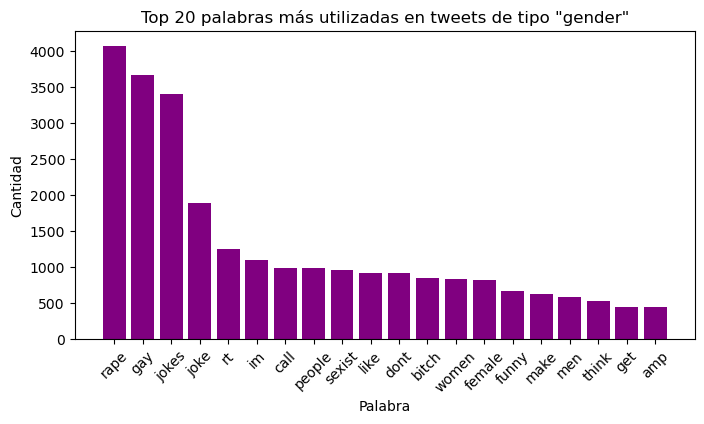

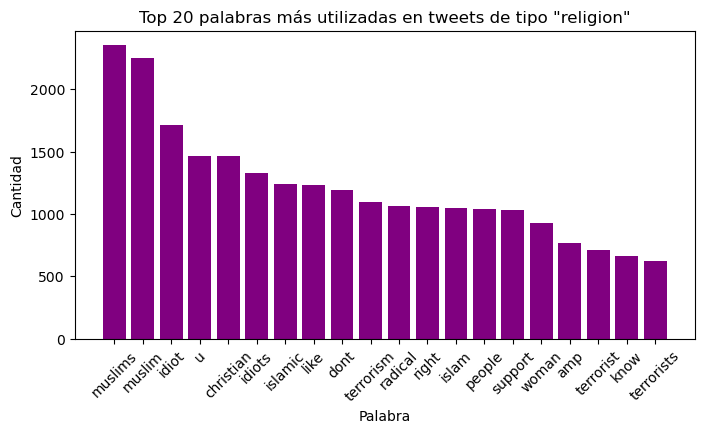

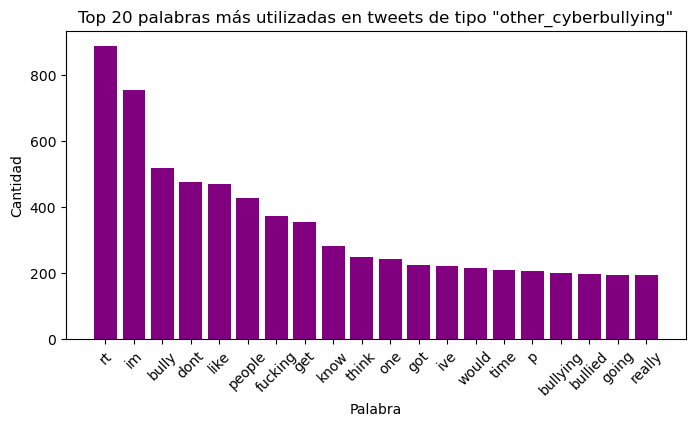

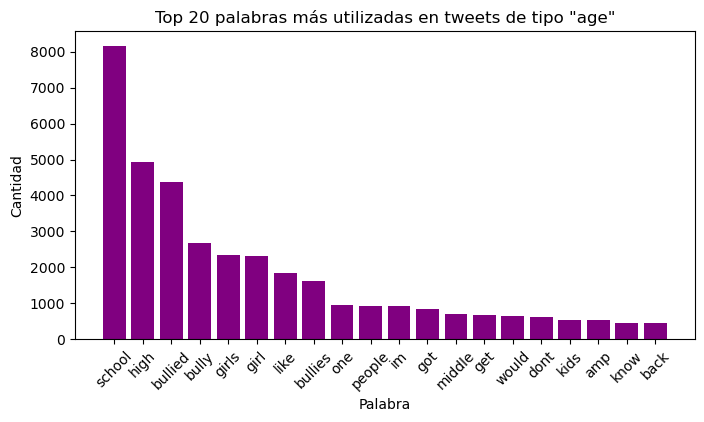

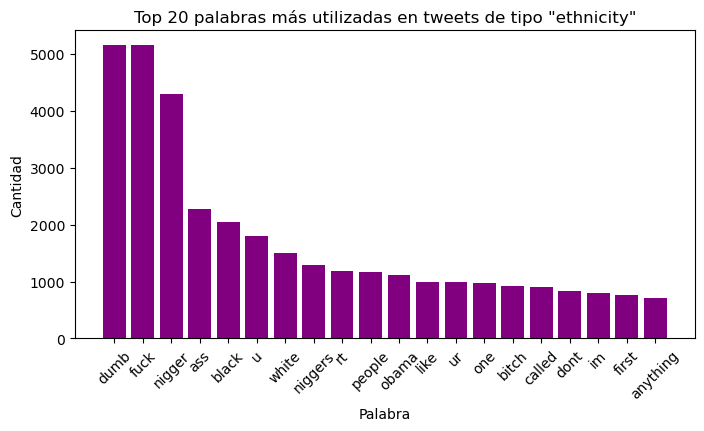

In [167]:
from collections import Counter
import matplotlib.pyplot as plt

def words_bar_charts(dataframe: pd.DataFrame, cyberbullying_classes: dict):
    for cyberbullying_type, value in cyberbullying_classes.items():
        df_filter = dataframe[dataframe['cyberbullying_numeric_type'] == value]
        
        # Join cleaned tweets into a single string
        text = ' '.join(df_filter.clean_tweet.to_list())
        
        # Split the text into words
        words = text.split()
        
        # Count the occurrences of each word
        word_counts = Counter(words)
        
        # Get the 20 most common words and their counts
        top_words = word_counts.most_common(20)
        
        # Extract words and counts for plotting
        words, counts = zip(*top_words)
        
        # Plot the bar chart
        plt.figure(figsize=(8, 4))
        plt.bar(words, counts, color='purple')
        plt.title(f'Top 20 palabras más utilizadas en tweets de tipo "{cyberbullying_type}"')
        plt.xlabel('Palabra')
        plt.ylabel('Cantidad')
        plt.xticks(rotation=45)
        plt.show()

# Definir el mapeo de clases de ciberacoso
cyberbullying_classes = {
    "not_cyberbullying": 0,
    "gender": 1,
    "religion": 2,
    "other_cyberbullying": 3,
    "age": 4,
    "ethnicity": 5
}

# Ejemplo de uso
words_bar_charts(dataframe, cyberbullying_classes)



In [168]:
count_words(dataframe)

Counter({'school': 8711,
         'like': 5867,
         'fuck': 5800,
         'dumb': 5330,
         'high': 5096,
         'people': 4812,
         'bullied': 4664,
         'im': 4497,
         'dont': 4407,
         'nigger': 4301,
         'rt': 4292,
         'rape': 4223,
         'u': 4112,
         'gay': 3971,
         'bully': 3586,
         'jokes': 3462,
         'one': 3404,
         'get': 2846,
         'girls': 2833,
         'ass': 2797,
         'girl': 2710,
         'black': 2695,
         'amp': 2608,
         'muslims': 2403,
         'know': 2342,
         'muslim': 2324,
         'white': 2187,
         'think': 2130,
         'would': 2055,
         'joke': 2031,
         'bitch': 2025,
         'idiot': 1983,
         'got': 1878,
         'right': 1836,
         'say': 1744,
         'fucking': 1677,
         'call': 1676,
         'even': 1657,
         'bullies': 1647,
         'go': 1639,
         'women': 1623,
         'cant': 1618,
         'make': 16

In [169]:
def wordcloud(df: pd.DataFrame, cyberbullying_type : str = None):
    
    if cyberbullying_type is None:
        df_filter = df
    else:
        df_filter = df[df['cyberbullying_type'] == cyberbullying_type]
    
    # Join cleaned tweets into a single string
    text = ' '.join(df_filter.clean_tweet.to_list())
    
    # Create WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

    # Display the generated word cloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(cyberbullying_type)
    plt.axis('off')
    plt.show()

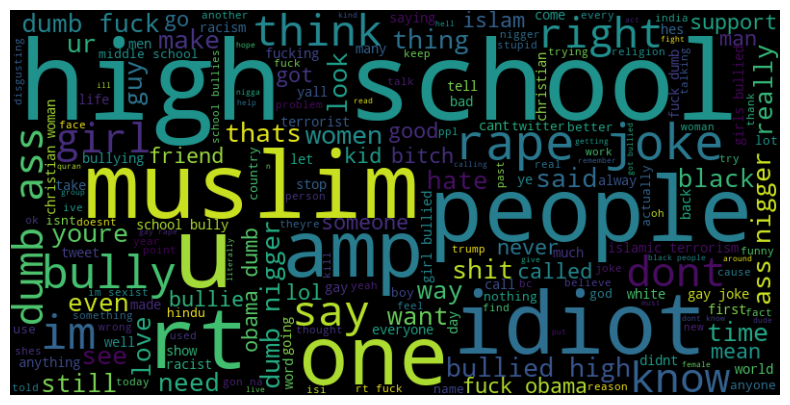

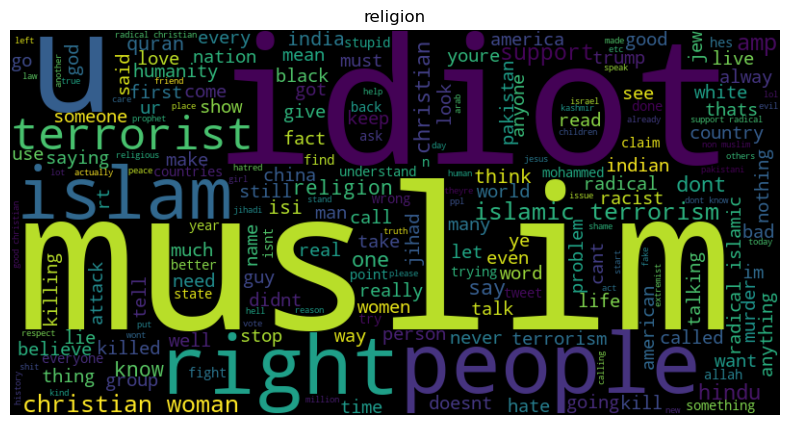

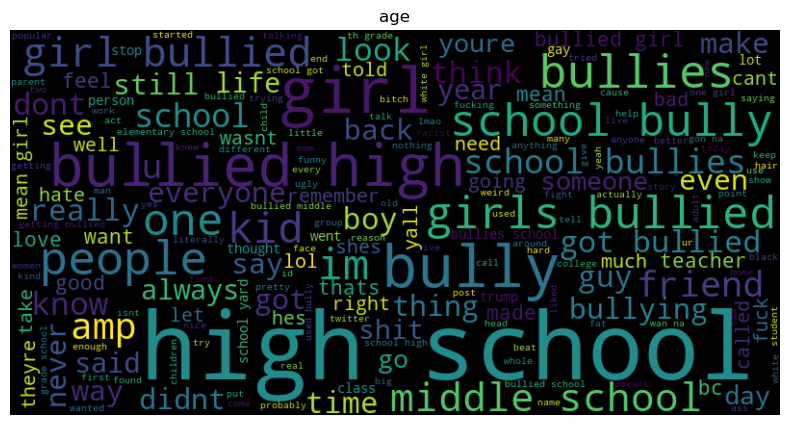

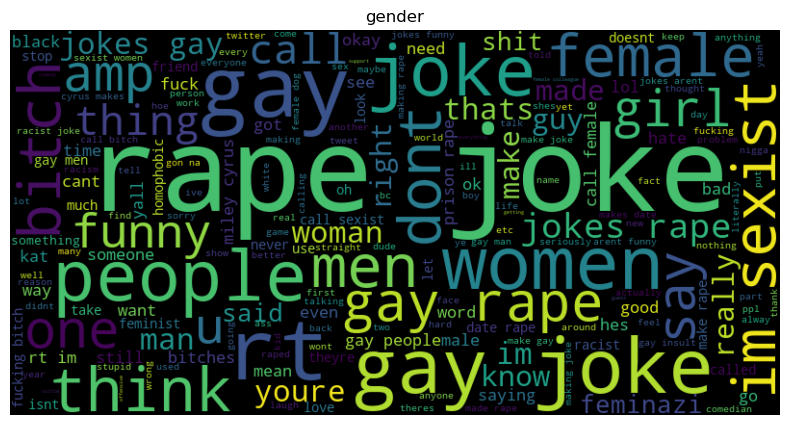

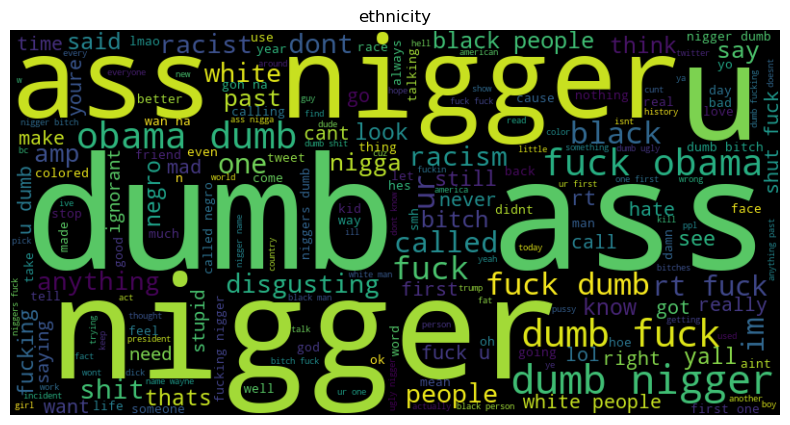

In [170]:
wordcloud(dataframe)
wordcloud(dataframe, 'religion')
wordcloud(dataframe, 'age')
wordcloud(dataframe, 'gender')
wordcloud(dataframe, 'ethnicity')

### Balanceo de clases

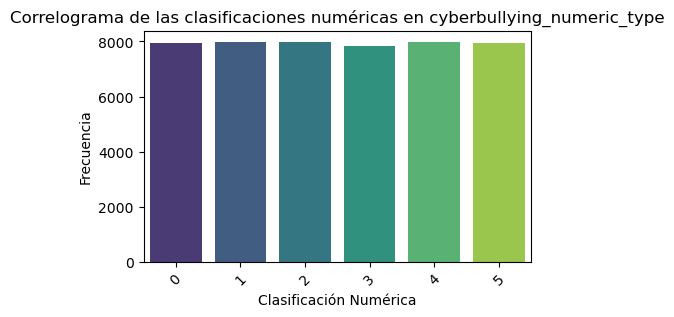

In [171]:
# Calcular la frecuencia de cada valor numérico
numeric_type_counts = dataframe['cyberbullying_numeric_type'].value_counts()

# Crear un gráfico de barras apiladas
plt.figure(figsize=(5, 3))
sns.countplot(data=dataframe, x='cyberbullying_numeric_type', palette='viridis')
plt.title('Correlograma de las clasificaciones numéricas en cyberbullying_numeric_type')
plt.xlabel('Clasificación Numérica')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()